In [1]:
print("Iniciando el script de analisis candidatos neutrones...")
print("Importando librerias necesarias...")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import functions_spills
import functions_analysis
from scipy.optimize import curve_fit
from collections import defaultdict
import matplotlib.ticker as ticker
import glob
import os
import pickle

from matplotlib import rcParams
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'
rcParams['figure.figsize'] = [10, 8]
rcParams['font.size'] = 22

Iniciando el script de analisis candidatos neutrones...
Importando librerias necesarias...


In [2]:
with open('Filtered_data/datos_filtrados.pkl', 'rb') as f:
    valores_read, indices_read = pickle.load(f)

with open('Filtered_data/datos_filtrados_sig.pkl', 'rb') as f:
    valores_read_sig, indices_read_sig = pickle.load(f)

times_branch_filtered = functions_analysis.a_lista_de_arrays(valores_read, indices_read)
times_branch_filtered_sig = functions_analysis.a_lista_de_arrays(valores_read_sig, indices_read_sig)

print("Datos filtrados descargados")
N_events = len(times_branch_filtered)
N_events_sig = len(times_branch_filtered_sig)

print("Numero de eventos bkg", N_events)
print("Numero de eventos señal", N_events_sig)

Datos filtrados descargados
Numero de eventos bkg 157955
Numero de eventos señal 79586


In [3]:
window_sizes = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500]

all_n_hits_dict = {}
all_n_hits_dict_sig = {}

for ws in window_sizes:
    filename = f'Plots/nHitsDistribution/csv/all_n_hits_window{ws}.csv'
    all_n_hits_dict[ws] = np.loadtxt(filename, delimiter=',', dtype=int)

    filename_sig = f'Plots/nHitsDistribution/csv/all_n_hits_window{ws}_sig.csv'
    all_n_hits_dict_sig[ws] = np.loadtxt(filename_sig, delimiter=',', dtype=int)


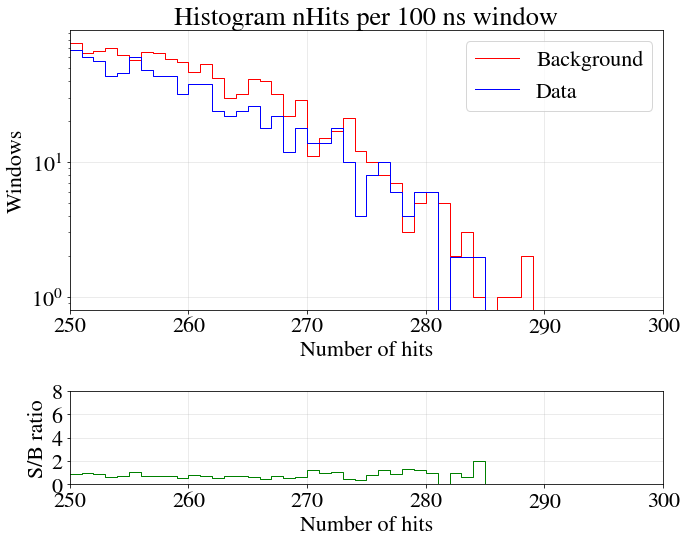

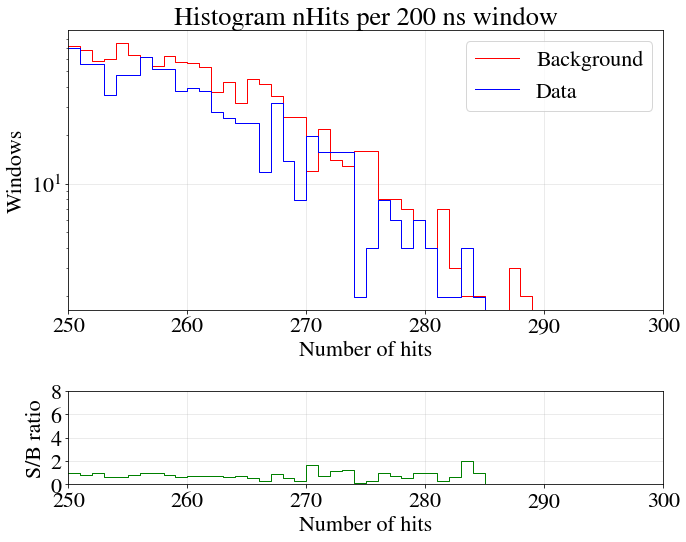

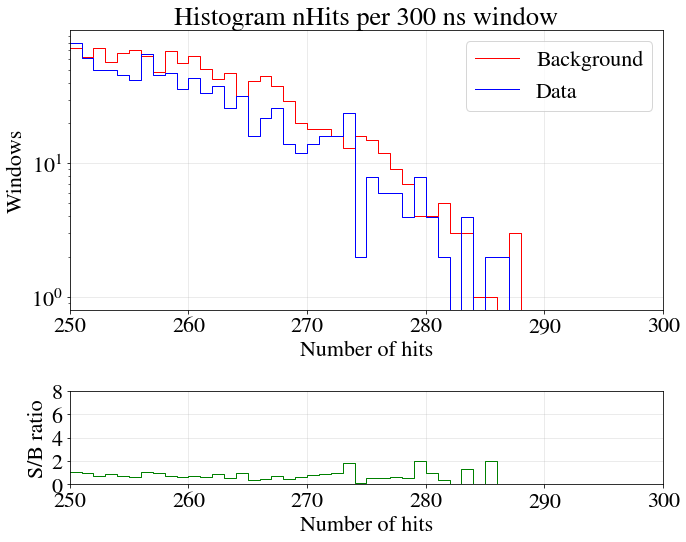

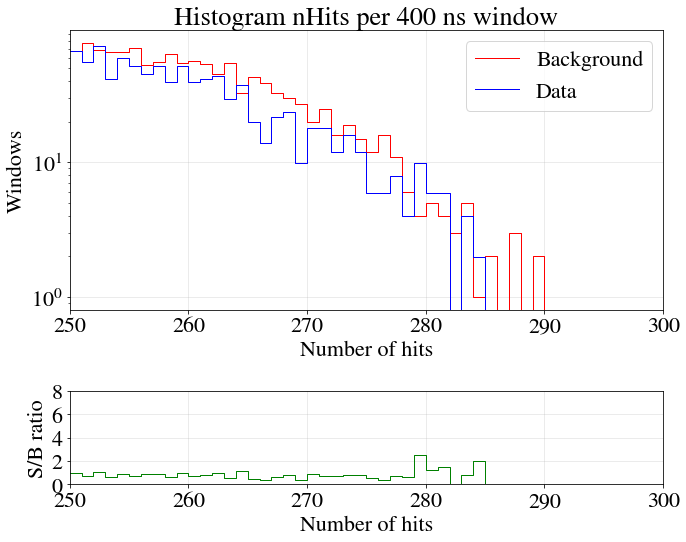

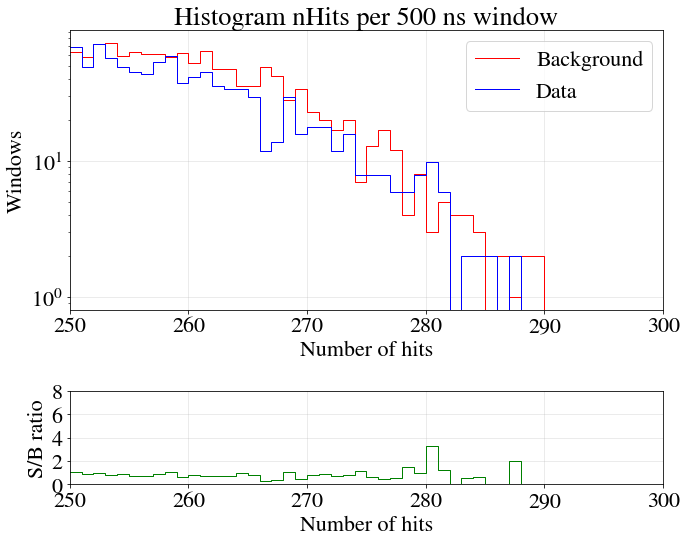

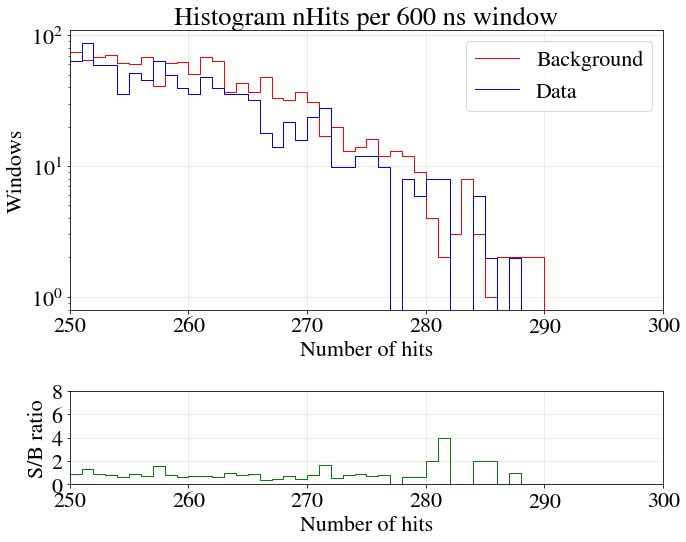

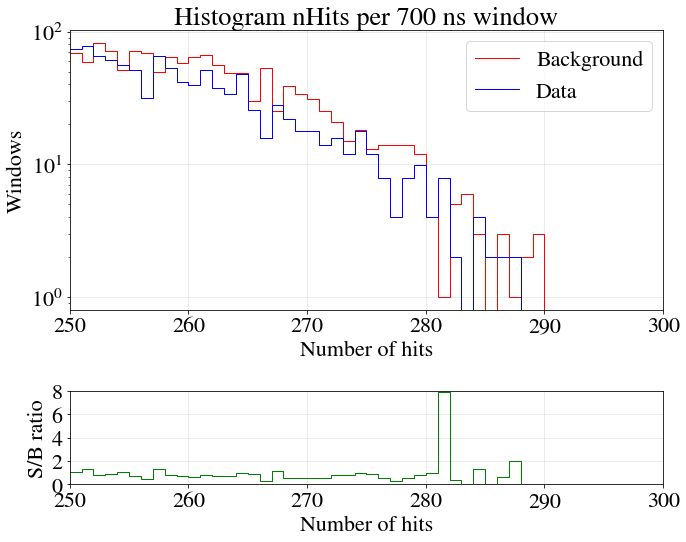

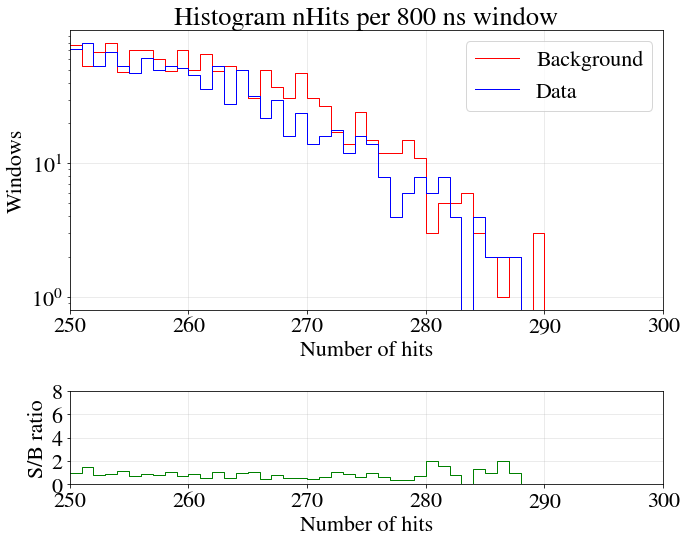

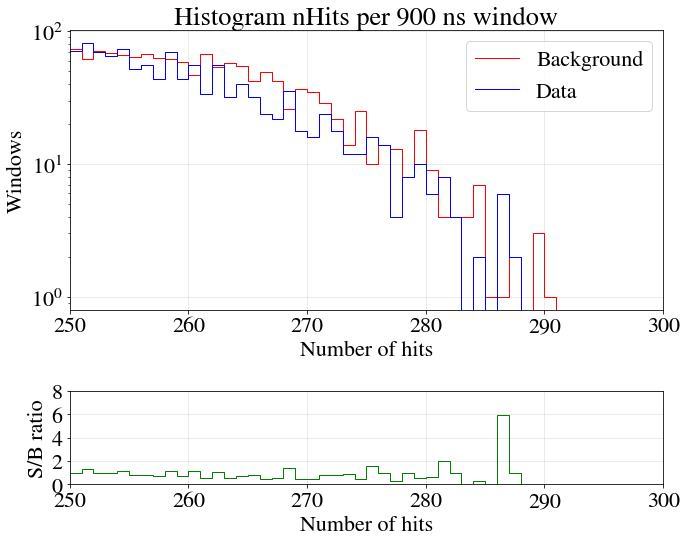

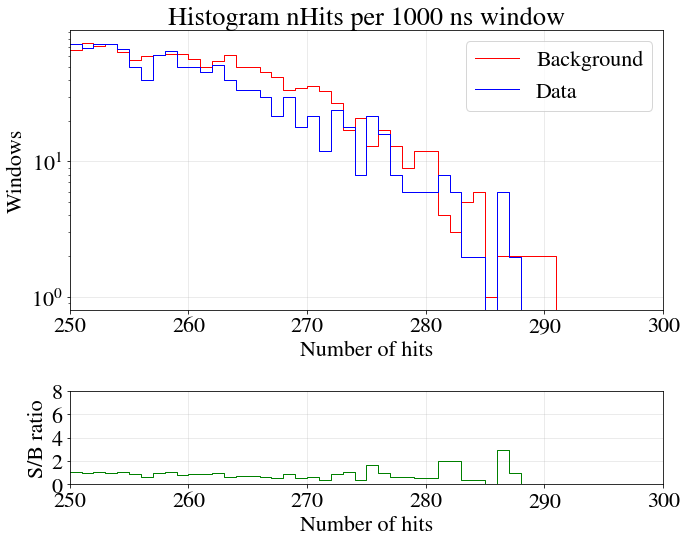

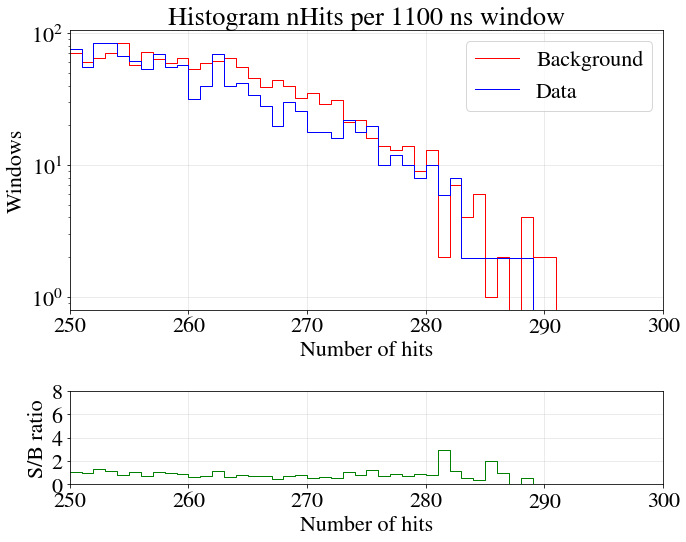

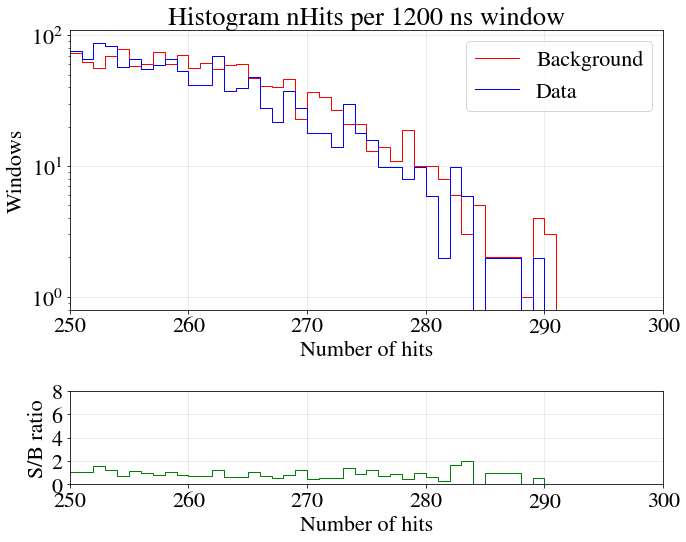

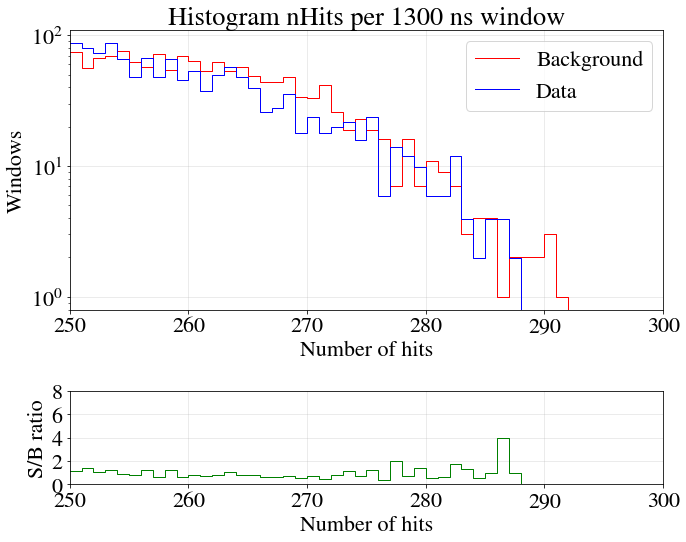

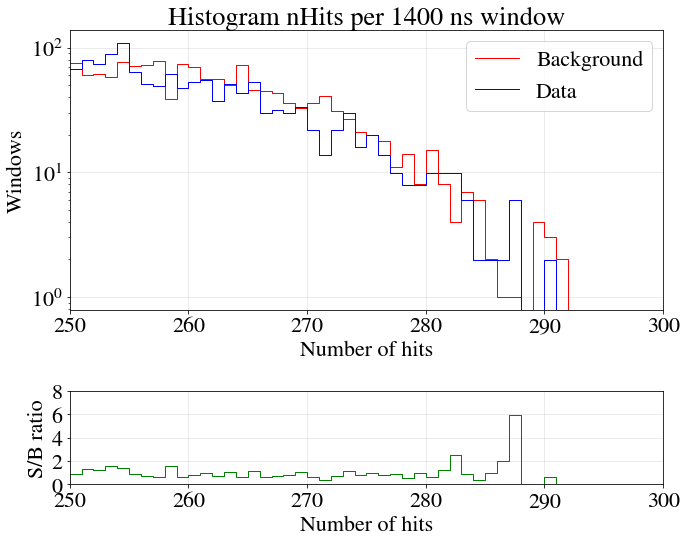

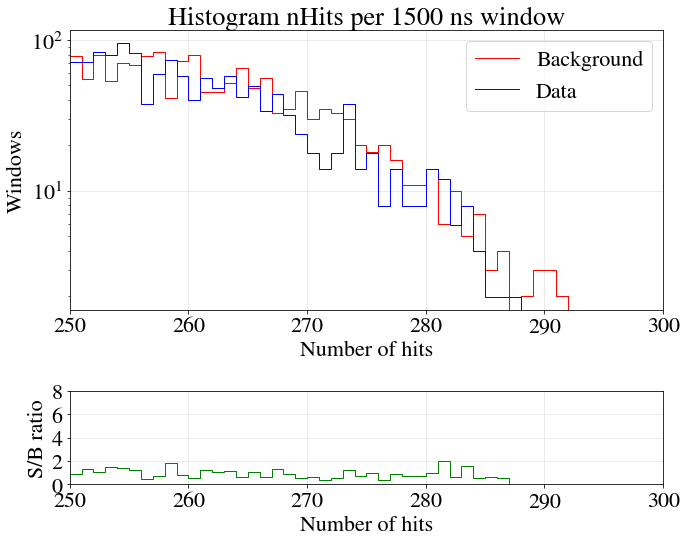

In [13]:
for ws in window_sizes:
    all_n_hits = all_n_hits_dict[ws]
    all_n_hits_sig = all_n_hits_dict_sig[ws]

    hist, bins_edges = np.histogram(all_n_hits, bins=50, range=(250, 300))
    hist_sig, _ = np.histogram(all_n_hits_sig, bins = bins_edges)

    fig, axs = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})

    # Top plot: Background and Signal
    axs[0].step(bins_edges[:-1], hist, where='post', linewidth=1, color='red', label='Background')
    axs[0].step(bins_edges[:-1], hist_sig * N_events / N_events_sig, where='post', linewidth=1, color='blue', label = 'Data')
    axs[0].set_ylabel('Windows')
    axs[0].set_xlabel('Number of hits')
    axs[0].set_title(f'Histogram nHits per {ws} ns window')
    axs[0].legend()
    axs[0].set_xlim(250, 300)
    axs[0].grid(alpha=0.3) 
    axs[0].set_yscale('log')

    # Bottom plot: Signal/Background Ratio
    ratio = np.divide(
        hist_sig * N_events / N_events_sig,
        hist,
        out=np.full_like(hist, 0, dtype=float),
        where=hist > 0)
    
    axs[1].step(bins_edges[:-1], ratio, linewidth = 1, where='post', color='green', label='Signal / Background')
    axs[1].set_xlabel("Number of hits")
    axs[1].set_ylabel("S/B ratio")
    axs[1].set_ylim(0, 8)
    axs[1].set_xlim(250, 300)
    axs[1].grid(alpha=0.3) 
    axs[1].set_yticks(np.arange(0, 9, 2)) 
    plt.tight_layout()
    plt.show()


In [ ]:
plt.figure()
color_list = ["red", "green", "orange", "black", "pink"]
for i, ws in enumerate(window_sizes):

    all_n_hits = all_n_hits_dict[ws]
    hist, bins_edges = np.histogram(all_n_hits, bins=100, range=(0, 100))

    # Top plot: Background and Signal
    plt.step(bins_edges[:-1], hist, where='post', linewidth=2, color=color_list[i], label=f'{ws}')
    
plt.ylabel('Windows')
plt.xlabel('Number of hits')
plt.title(f'Histogram nHits Background')
plt.legend()
plt.show()

In [ ]:
plt.figure()
color_list = ["red", "green", "orange", "black", "pink"]
for i, ws in enumerate(window_sizes):

    all_n_hits = all_n_hits_dict_sig[ws]
    hist, bins_edges = np.histogram(all_n_hits, bins=50, range=(0, 100))

    # Top plot: Background and Signal
    plt.step(bins_edges[:-1], hist * N_events / N_events_sig, where='post', linewidth=2, color=color_list[i], label=f'{ws}')
    
plt.ylabel('Windows')
plt.xlabel('Number of hits')
plt.title(f'Histogram nHits Data')
plt.legend()
plt.show()

In [ ]:
filename = f'Plots/nHitsDistribution/csv/all_n_hits_window500_100-300.csv'
all_n_hits_100 = np.loadtxt(filename, delimiter=',', dtype=int)

filename_sig = f'Plots/nHitsDistribution/csv/all_n_hits_window500_sig_100-300.csv'
all_n_hits_100_sig = np.loadtxt(filename_sig, delimiter=',', dtype=int)

hist, bins_edges = np.histogram(all_n_hits_100, bins=105, range=(90, 300))
hist_sig, _ = np.histogram(all_n_hits_100_sig, bins = bins_edges)


fig, axs = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})

# Top plot: Background and Signal
axs[0].step(bins_edges[:-1], hist, where='post', linewidth=1, color='red', label='Background')
axs[0].step(bins_edges[:-1], hist_sig * N_events / N_events_sig, where='post', linewidth=1, color='blue', label = 'Data')
axs[0].set_ylabel('Windows')
axs[0].set_xlabel('Number of hits')
axs[0].set_title(f'Histogram nHits per 500 ns window')
axs[0].legend()
axs[0].grid(alpha = 0.3)
# Bottom plot: Signal/Background Ratio
ratio = np.divide(
    hist_sig * N_events / N_events_sig,
    hist,
    out=np.full_like(hist, 0, dtype=float),
    where=hist > 0)
axs[1].step(bins_edges[:-1], ratio, linewidth = 1, where='post', color='green', label='Signal / Background')
axs[1].set_xlabel("Number of hits")
axs[1].set_ylabel("S/B ratio")
axs[1].set_ylim(0, 2)
axs[1].set_yticks(np.arange(0, 3, 1)) 
axs[1].grid(alpha = 0.3)
plt.tight_layout()
plt.show()

In [ ]:
filename = f'Plots/nHitsDistribution/csv/all_n_hits_window500_100-300.csv'
all_n_hits_500 = np.loadtxt(filename, delimiter=',', dtype=int)

filename_sig = f'Plots/nHitsDistribution/csv/all_n_hits_window500_sig_100-300.csv'
all_n_hits_500_sig = np.loadtxt(filename_sig, delimiter=',', dtype=int)


In [ ]:
hist, bins_edges = np.histogram(all_n_hits_500, bins=50, range=(0, 500))
hist_sig, _ = np.histogram(all_n_hits_500_sig, bins = bins_edges)

fig, axs = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})

# Top plot: Background and Signal
axs[0].step(bins_edges[:-1], hist, where='post', linewidth=1, color='red', label='Background')
axs[0].step(bins_edges[:-1], hist_sig * N_events / N_events_sig, where='post', linewidth=1, color='blue', label = 'Data')
axs[0].set_ylabel('Windows')
axs[0].set_xlabel('Number of hits')
axs[0].set_title(f'Histogram nHits per {ws} ns window')
axs[0].legend()

# Bottom plot: Signal/Background Ratio
ratio = np.divide(
    hist_sig * N_events / N_events_sig,
    hist,
    out=np.full_like(hist, 0, dtype=float),
    where=hist > 0)
axs[1].step(bins_edges[:-1], ratio, linewidth = 1, where='post', color='green', label='Signal / Background')
axs[1].set_xlabel("Number of hits")
axs[1].set_ylabel("S/B ratio")
axs[1].set_ylim(0, 2)
axs[1].set_yticks(np.arange(0, 3, 1)) 
plt.tight_layout()
plt.show()